In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/traffic.csv')

In [ ]:
# Display column names and basic information about the dataset
print("Column names in the dataset:", data.columns)
print(data.info())

Column names in the dataset: Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
print(data.head())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [ ]:
# Handle missing values if any
data.fillna(method='bfill', inplace=True)


In [ ]:
# Feature engineering
data['hour'] = pd.to_datetime(data['DateTime']).dt.hour
data['day_of_week'] = pd.to_datetime(data['DateTime']).dt.dayofweek
data['month'] = pd.to_datetime(data['DateTime']).dt.month


In [ ]:

# Drop the original DateTime column and ID column (if it's not needed)
data.drop(columns=['DateTime', 'ID'], inplace=True)

In [ ]:
#after dropping the not needed column
print(data.head())

   Junction  Vehicles  hour  day_of_week  month
0         1        15     0            6     11
1         1        13     1            6     11
2         1        10     2            6     11
3         1         7     3            6     11
4         1         9     4            6     11


In [ ]:
# Split data into features and target
X = data.drop(columns=['Vehicles'])
y = data['Vehicles']

In [ ]:
print(X)
print(y)

       Junction  hour  day_of_week  month
0             1     0            6     11
1             1     1            6     11
2             1     2            6     11
3             1     3            6     11
4             1     4            6     11
...         ...   ...          ...    ...
48115         4    19            4      6
48116         4    20            4      6
48117         4    21            4      6
48118         4    22            4      6
48119         4    23            4      6

[48120 rows x 4 columns]
0        15
1        13
2        10
3         7
4         9
         ..
48115    11
48116    30
48117    16
48118    22
48119    12
Name: Vehicles, Length: 48120, dtype: int64


In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the neural network model
model = Sequential()


In [ ]:
# Add input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))


In [ ]:
# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

In [ ]:
# Add output layer
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
963/963 [==============================] - 2s 3ms/step - loss: 122.8716 - mae: 7.6067 - val_loss: 124.0413 - val_mae: 7.7496
Epoch 2/100
963/963 [==============================] - 2s 2ms/step - loss: 122.7741 - mae: 7.6060 - val_loss: 127.8364 - val_mae: 7.7573
Epoch 3/100
963/963 [==============================] - 2s 2ms/step - loss: 122.9427 - mae: 7.5972 - val_loss: 123.6123 - val_mae: 7.7234
Epoch 4/100
963/963 [==============================] - 2s 3ms/step - loss: 122.4845 - mae: 7.5815 - val_loss: 123.8554 - val_mae: 7.6710
Epoch 5/100
963/963 [==============================] - 8s 8ms/step - loss: 122.6595 - mae: 7.5926 - val_loss: 124.5728 - val_mae: 7.6905
Epoch 6/100
963/963 [==============================] - 7s 8ms/step - loss: 122.4361 - mae: 7.5789 - val_loss: 123.7953 - val_mae: 7.7148
Epoch 7/100
963/963 [==============================] - 7s 8ms/step - loss: 122.0076 - mae: 7.5589 - val_loss: 124.5848 - val_mae: 7.6836
Epoch 8/100
963/963 [====================

In [ ]:
# Evaluate the model
train_loss, train_mae = model.evaluate(X_train_scaled, y_train)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)


301/301 [==============================] - 1s 3ms/step - loss: 116.5423 - mae: 7.4305


In [ ]:
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

Train MAE: 7.476821422576904
Test MAE: 7.430509090423584


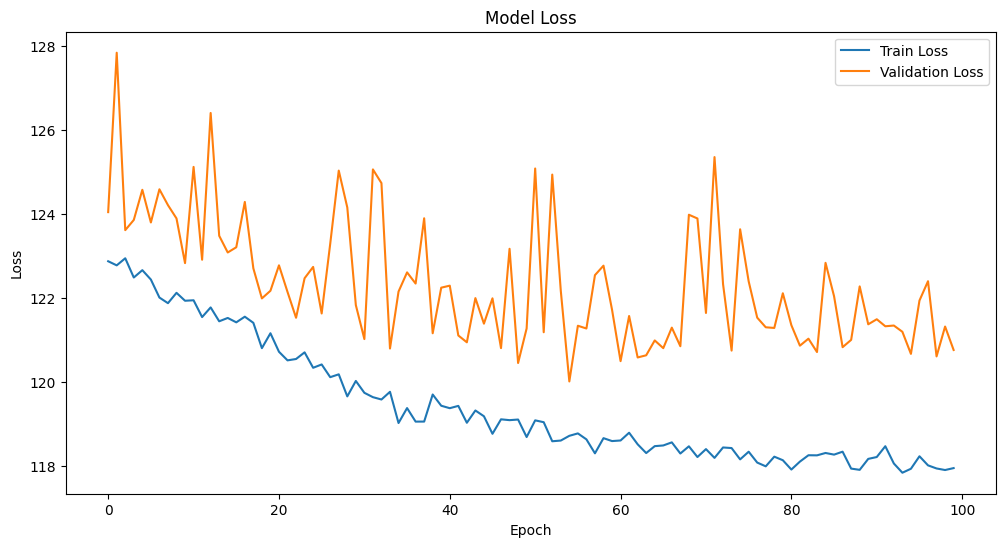

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

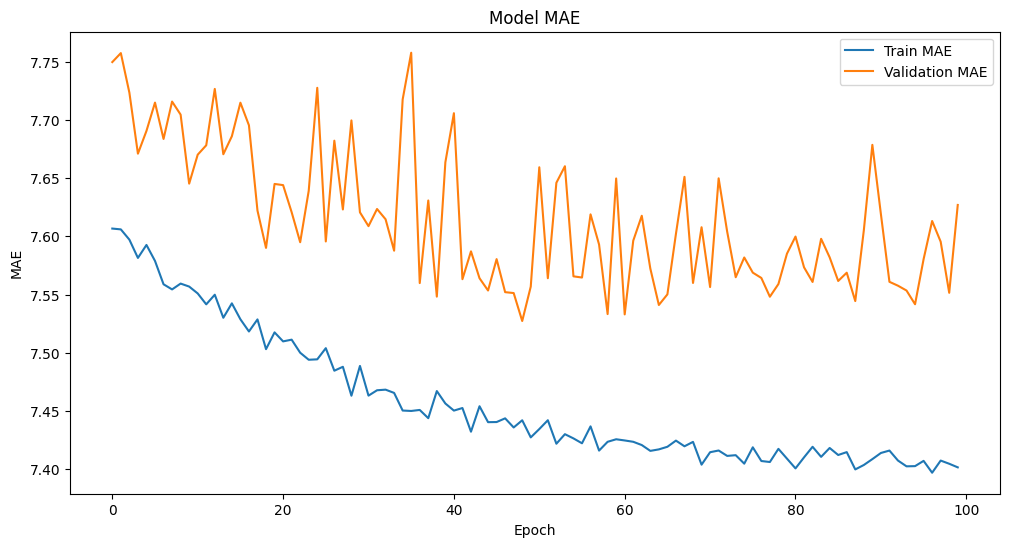

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import joblib

# Save the model
model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model and make predictions
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model.h5')
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print("Sample prediction:", prediction)

1/1 [==============================] - 0s 172ms/step
Sample prediction: [[9.476306]]
